In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import nbimporter

In [24]:
import pandas_to_latex

### Get Performance Measures

In [25]:
def get_performance_measures(y_true, y_pred):
    label_list = unique_labels(y_pred)
    acc        = accuracy_score(y_true, y_pred)
    precision  = precision_score(y_true, y_pred, average=None, labels=label_list)
    recall     = recall_score(y_true, y_pred, average=None, labels=label_list)
    f1         = f1_score(y_true, y_pred, average=None, labels=label_list)
    
    print(f'Total Accuracy \t\t{acc:.3f}\n')
    print('Status \t\t\t\t Precision \t Recall \t F1')
    print('----------------------------------------------------------------------')
    for i in range(len(label_list)):
        print(f'{label_list[i]:<25} \t {precision[i]:.3f} \t\t {recall[i]:.3f} \t\t {f1[i]:.3f}')


# Confusion matrix

In [26]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = unique_labels(y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax


# Cross validation

In [27]:
import nbimporter
from sklearn import metrics
from multiscorer import MultiScorer
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score          # Scikit's libraries for demonstration

def get_cross_validation_df(clf,X,y):
    scorer = MultiScorer({                                               # Create a MultiScorer instance
        'precision': (precision_score, {'average': None}),
        'recall' : (recall_score, {'average': None}),
        'f1-score': (f1_score, {'average': None})
    })

    scores = cross_val_score(clf, X, y, scoring=scorer,cv=10)
    
    results = scorer.get_results()
    
    return_df = pd.DataFrame(columns = results.keys())
    return_df.style.hide_index()

    i=0
    for name in results.keys():
        return_df.at[0,name] = np.average(results[name])
        i = i+1
        
    pandas_to_latex.df_to_latex(return_df)
    return return_df

## Testing:

In [28]:
from sklearn.model_selection import train_test_split
    
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    return X_train, X_test, y_train, y_test

In [29]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

def train_rf_model(X_train,y_train, X_test):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)

Confusion matrix, without normalization
[[23  0  0]
 [ 1 17  1]
 [ 0  0 17]]


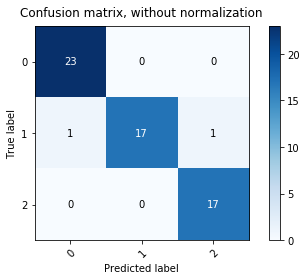

In [31]:
plot_confusion_matrix(y_test,y_test_pred)

In [32]:
get_performance_measures(y_test, y_test_pred)

Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.958 		 1.000 		 0.979
1                         	 1.000 		 0.895 		 0.944
2                         	 0.944 		 1.000 		 0.971


## Testing cross validation

In [33]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split


def train_rf_model(X_train,y_train):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)
    return rf

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)


rf = train_rf_model(X, y)

In [34]:
df = get_cross_validation_df(rf,X,y)
df


\begin{tabular}{lll}
\toprule
precision &    recall &  f1-score \\
\midrule
 0.971825 &  0.967937 &  0.967743 \\
\bottomrule
\end{tabular}



,precision,recall,f1-score
0,0.971825,0.967937,0.967743
